# Modelling and Analysis of Complex Networks - Homework 3

### Setup

In [42]:
# IMPORTANT !! only run this cell if you are on colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Installing and Importing Packages

!pip install networkx
import networkx as nx

# Creating the graphs

#Create two NetworkX graph objects for Facebook and Twitter. The graph for Facebook is undirected but the graph for Twitter is Directed.
facebook = nx.Graph()
twitter = nx.DiGraph()

#Read the edges and construct the graph for Facebook -
#It is important to note that facebook's graph is undirected and that The 'ego' node does not appear, but it is assumed that they follow every node id that appears in the file.
file_path = '/content/drive/My Drive/MADS/Facebook-Ego/3437_2.edges' # IMPORTANT !! please replace by your local filepath
f = open(file_path, "r")
fb_edges = []

for line in f:
  node_1 = int(line.split(" ")[0])
  node_2 = int(line.split(" ")[1])
  fb_edges.append((node_1, node_2))
f.close()

facebook.add_edges_from(fb_edges)

#Read the edges and construct the graph for Twitter -
#It is important to note that Edges are directed (a follows b). The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.
file_path = '/content/drive/My Drive/MADS/Twitter-Ego/6408382.edges' # IMPORTANT !! please replace by your local filepath
f = open(file_path, "r")
twitter_edges = []

for line in f:
  node_1 = int(line.split(" ")[0])
  node_2 = int(line.split(" ")[1])
  twitter_edges.append((node_1, node_2))
f.close()

twitter.add_edges_from(twitter_edges)

#### (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of k and p. Please plot the graph structures, degree distributions, and clustering coefficients as well.

In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

n = int(facebook.number_of_nodes()) # number of nodes should be the same as facebook
k_values = [4, 8, 12] # 3 random k values
p_values = [0.1, 0.3, 0.5] # 3 random p values

In [45]:
def plot_graph_structure(G, k, p):
    plt.figure(figsize=(5, 5))
    nx.draw(G, node_size=10, node_color='blue')
    plt.title(f'Graph Structure (k={k}, p={p})')
    plt.show()

In [46]:
def degree_distribution(G, k, p):
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(5, 5))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True)
    plt.title(f'Degree Distribution (k={k}, p={p})')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

In [47]:
def clustering_coefficient(G, k, p):
    clustering_coeffs = list(nx.clustering(G).values())
    plt.figure(figsize=(5, 5))
    plt.hist(clustering_coeffs, bins=30, density=True)
    plt.title(f'Clustering Coefficient (k={k}, p={p})')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.show()

In [48]:
def plot_graph_metrics(G, k, p):
    plot_graph_structure(G, k, p)
    degree_distribution(G, k, p)
    clustering_coefficient(G, k, p)

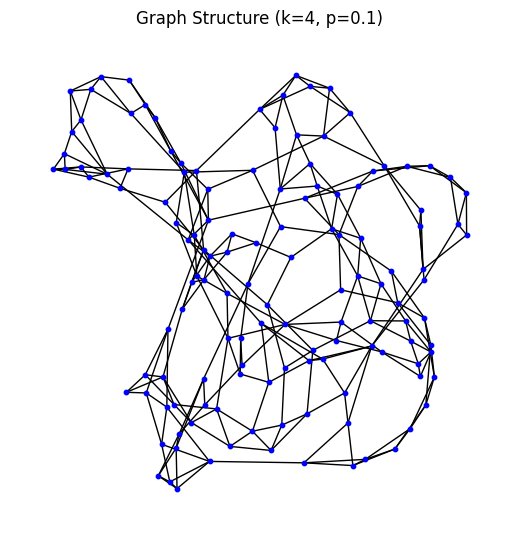

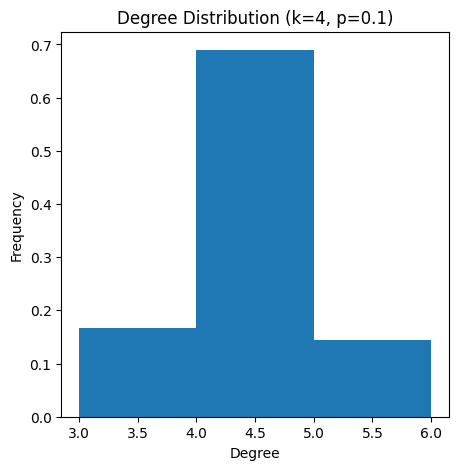

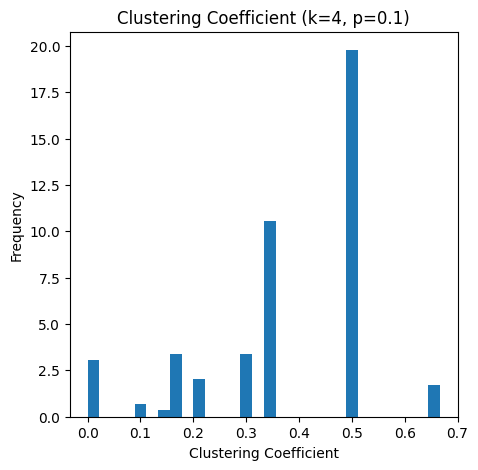

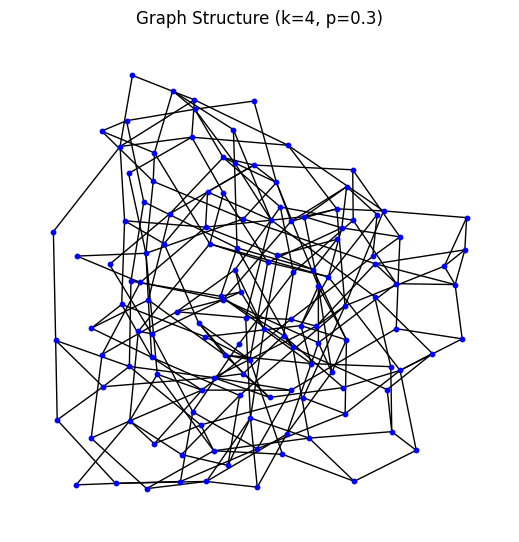

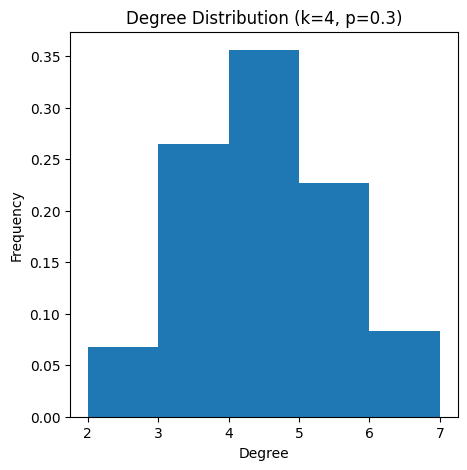

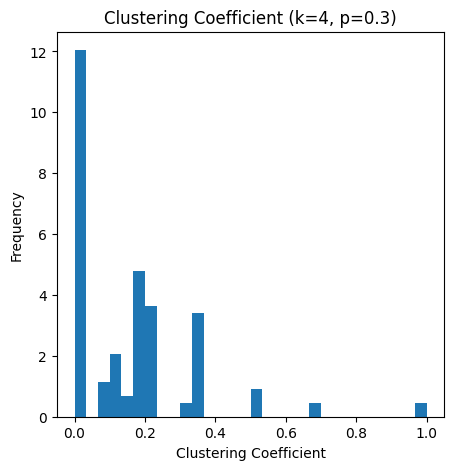

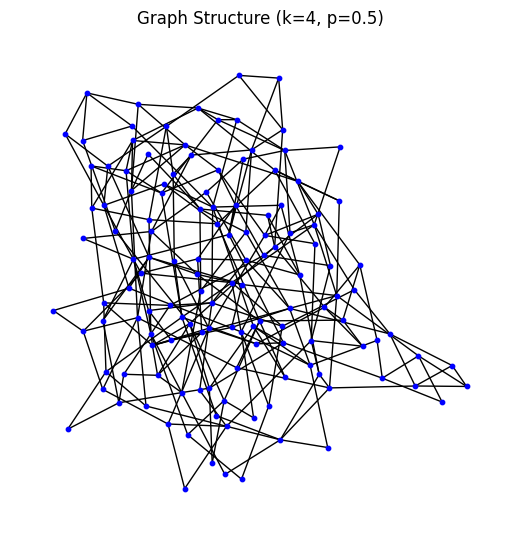

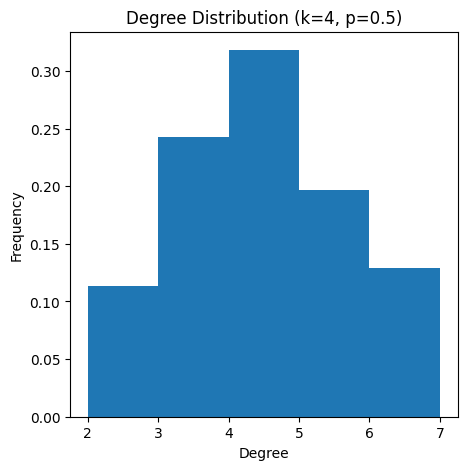

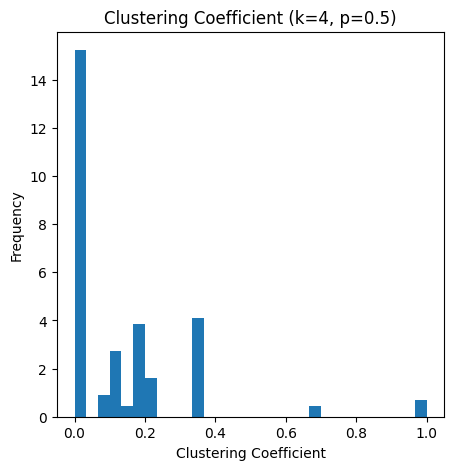

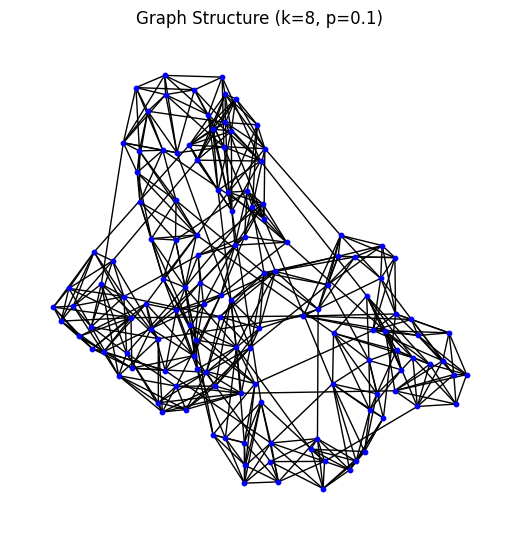

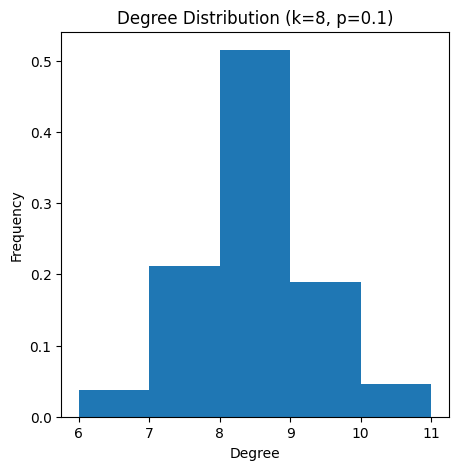

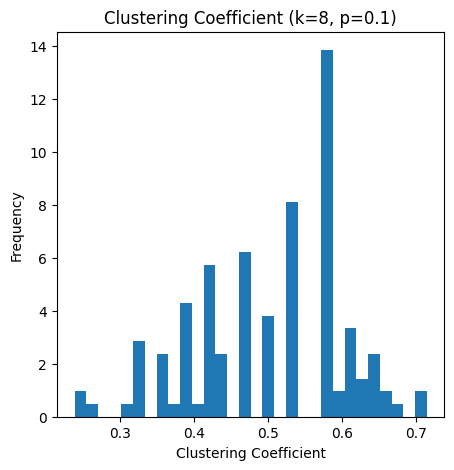

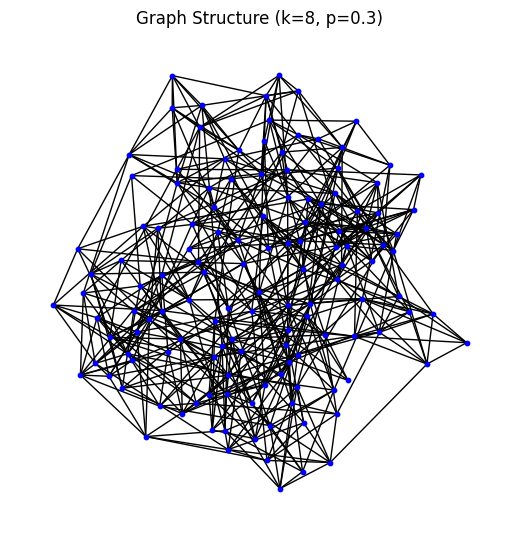

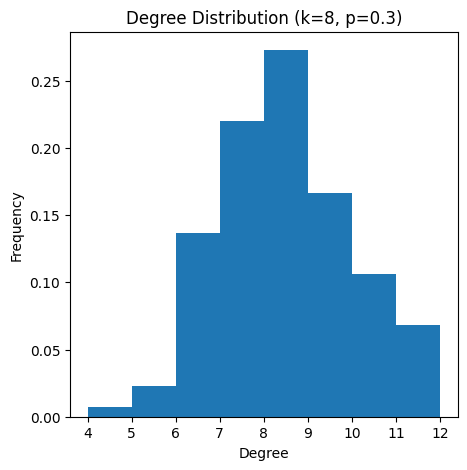

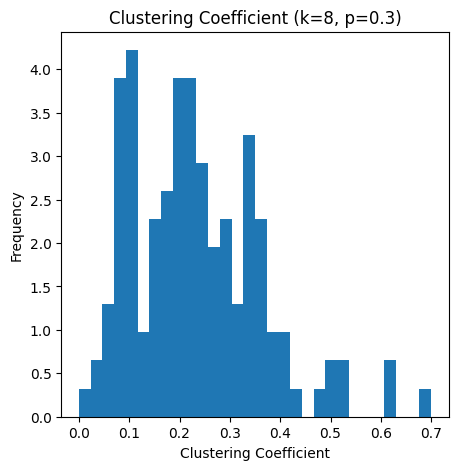

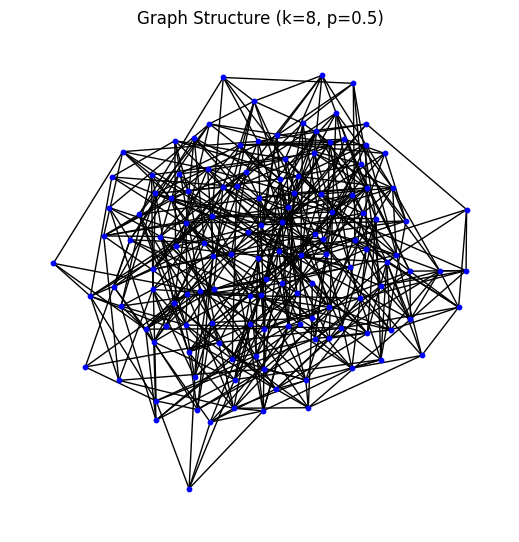

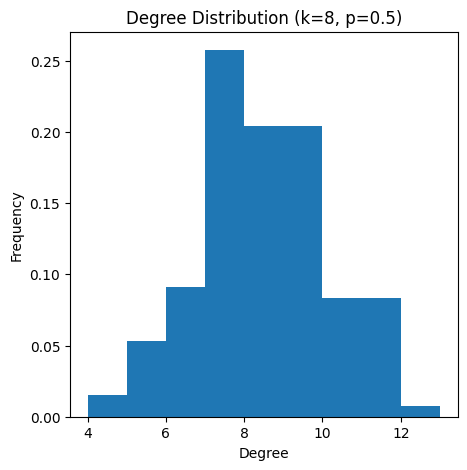

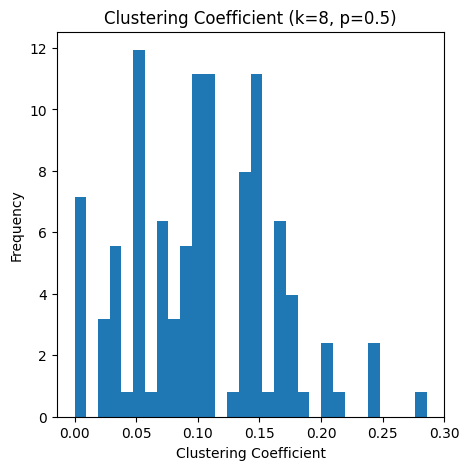

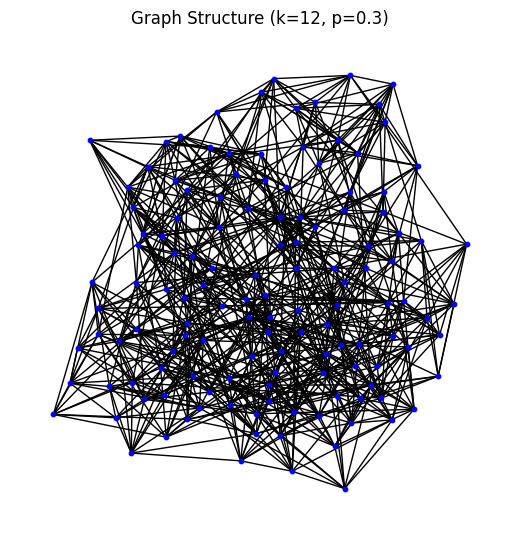

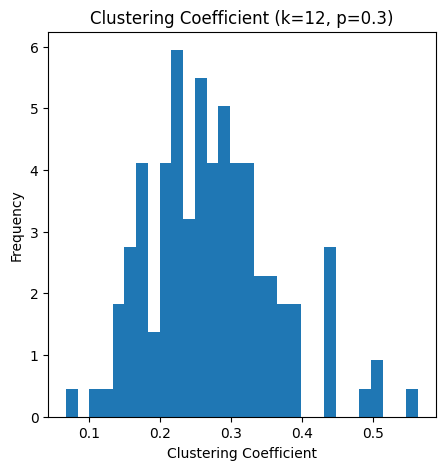

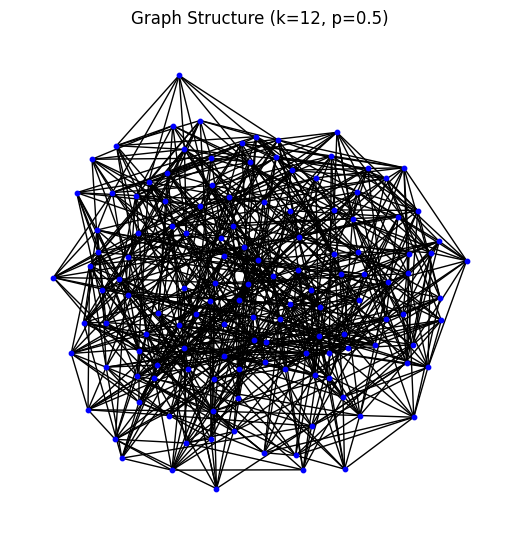

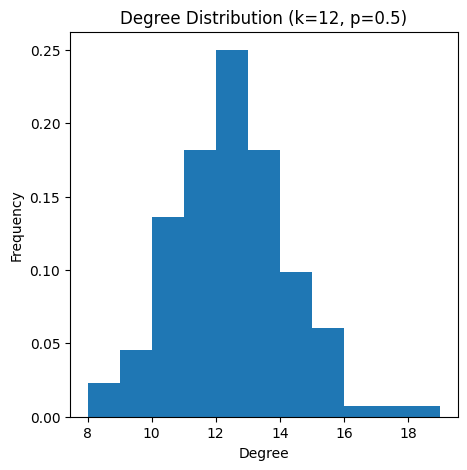

In [49]:
for k in k_values:
    for p in p_values:
        G = nx.watts_strogatz_graph(n, k, p)
        plot_graph_metrics(G, k, p)

#### (b) Generate scale-free graphs, and each of them should have the same number of nodes as Facebook- Ego. Please generate 3 graphs with three different values of γ. Please plot the graph structures, degree distributions, and clustering coefficients as well.

In [50]:
gamma_values = [2.1, 2.5, 3.0]

In [51]:
def plot_sf_graph_structure(G, gamma):
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray')
    plt.title(f'Graph Structure (gamma={gamma})')
    plt.show()

In [52]:
def sf_deg_distribution(G, gamma):
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(5, 5))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True, color='blue', log=True)
    plt.yscale('log') # log scale
    plt.xscale('log') # log scale
    plt.title(f'Degree Distribution (Log-Log Scale) (gamma={gamma})')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.show()

In [53]:
def sf_clustering_coeffs(G, gamma):
    clustering_coeffs = list(nx.clustering(G).values())
    plt.figure(figsize=(5, 5))
    plt.hist(clustering_coeffs, bins=30, density=True, color='blue')
    plt.title(f'Clustering Coefficient Distribution (γ={gamma})')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.show()

In [54]:
def plot_sf_graph(G, gamma):
    plot_sf_graph_structure(G, gamma)
    sf_deg_distribution(G, gamma)
    sf_clustering_coeffs(G, gamma)

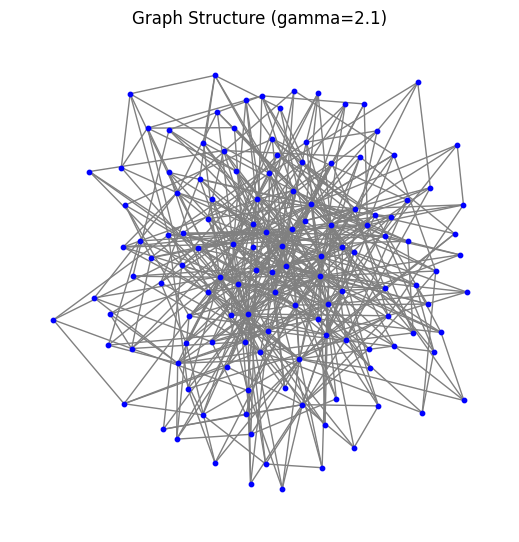

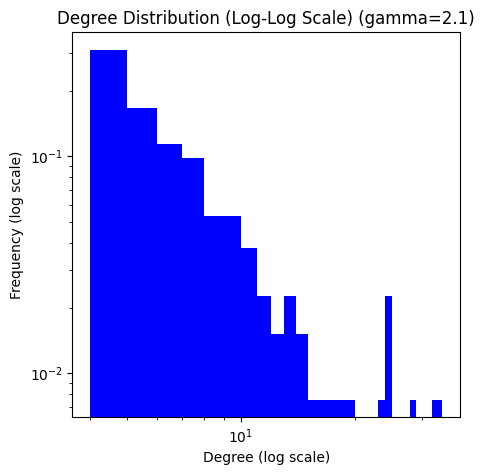

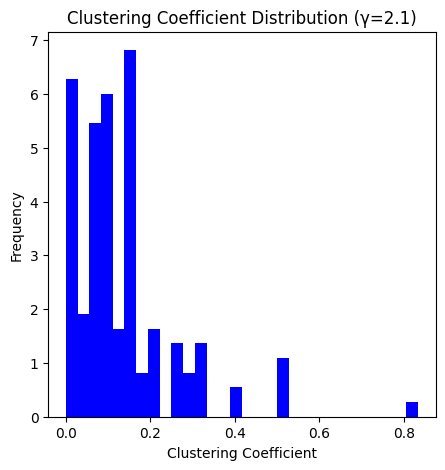

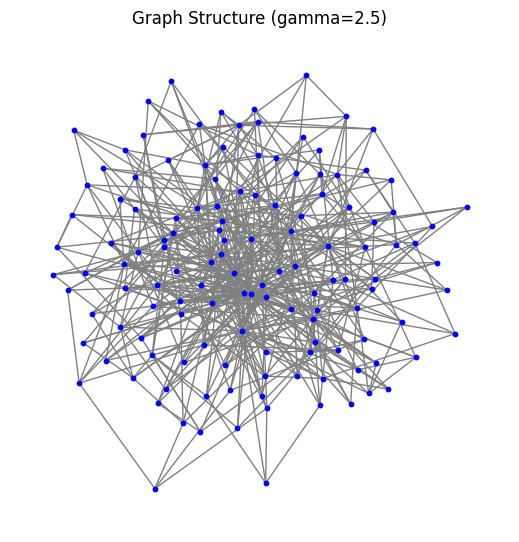

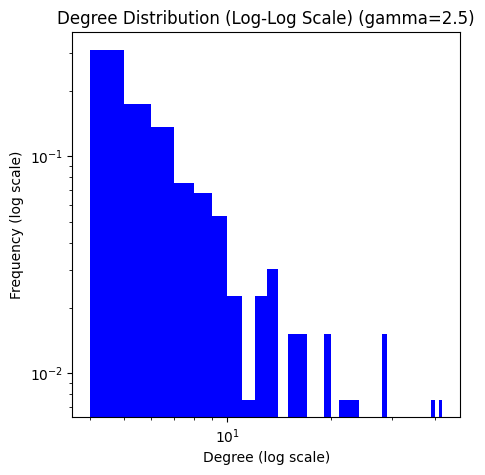

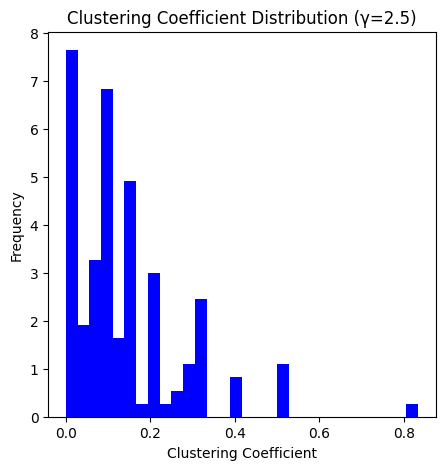

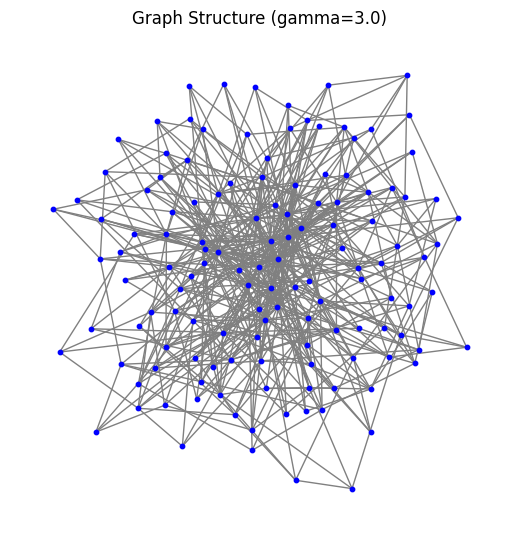

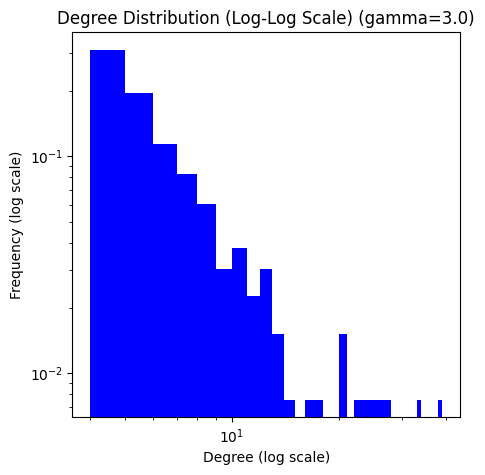

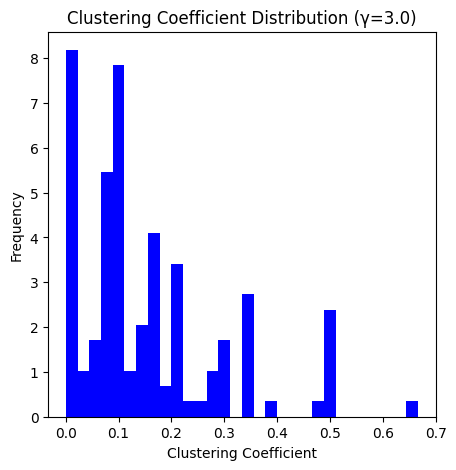

In [55]:
for gamma in gamma_values:
    G = nx.powerlaw_cluster_graph(n, m=4, p=0.05)
    plot_sf_graph(G, gamma)

#### (c) Generate graphs based on Barabasi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well.

In [56]:
m0_values = [3, 5, 7]
m_values = [2, 4, 6]

In [57]:
def plot_ba_graph_structure(G, m0, m):
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G)  # Generate positions for the graph layout
    nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray')
    plt.title(f'Graph Structure (m0={m0}, m={m})')
    plt.show()

In [58]:
def ba_degree_distribution(G, m0, m):
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(5, 5))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True, color='blue', log=True)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Degree Distribution (Log-Log Scale) (m0={m0}, m={m})')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.show()

In [59]:
def ba_clustering_coeffs(G, m0, m):
    clustering_coeffs = list(nx.clustering(G).values())
    plt.figure(figsize=(5, 5))
    plt.hist(clustering_coeffs, bins=30, density=True, color='blue')
    plt.title(f'Clustering Coefficient (m0={m0}, m={m})')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.show()

In [60]:
def plot_ba_graph(G, m0, m):
    plot_ba_graph_structure(G, m0, m)
    ba_degree_distribution(G, m, m0)
    ba_clustering_coeffs(G, m, m0)

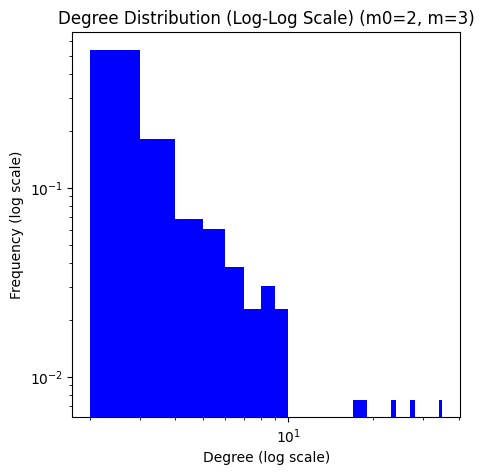

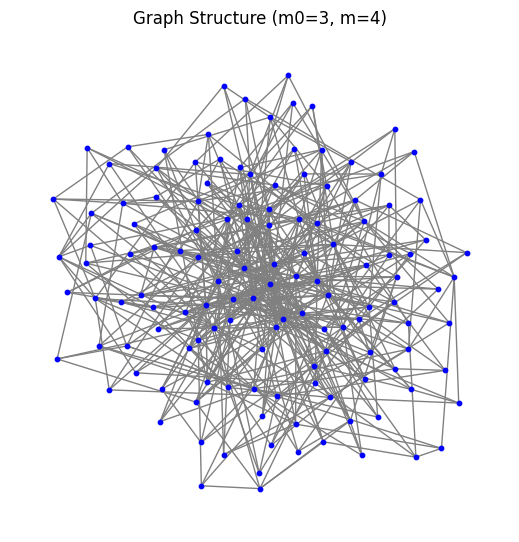

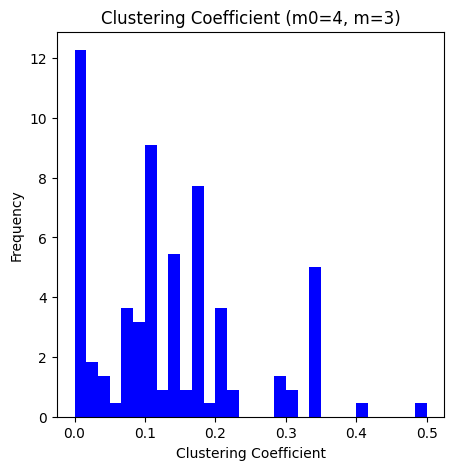

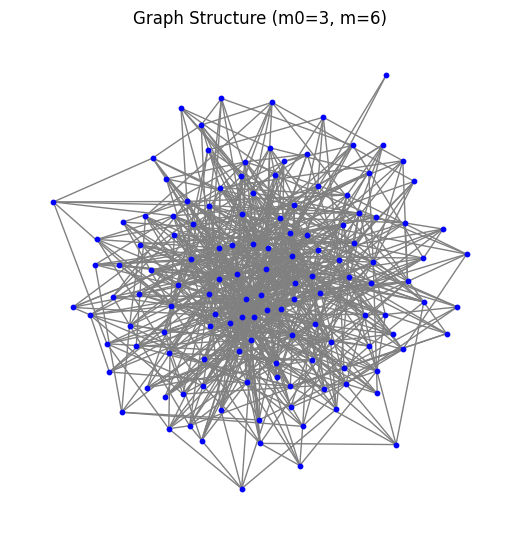

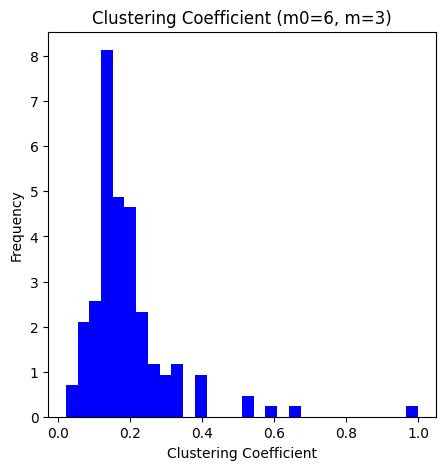

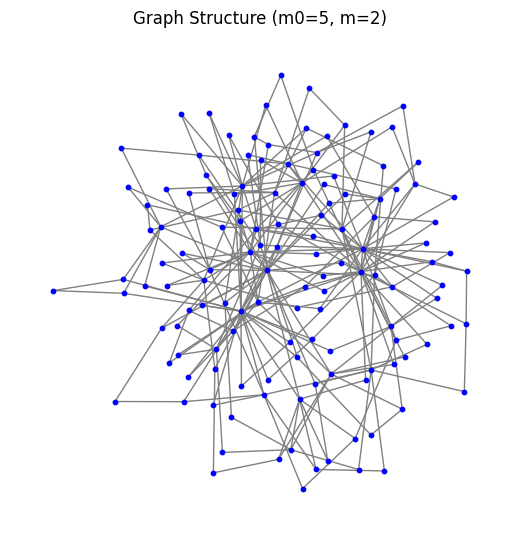

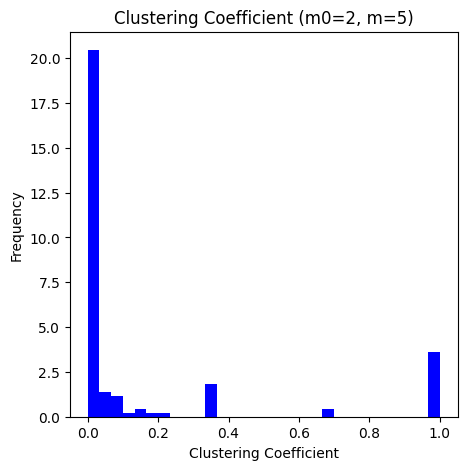

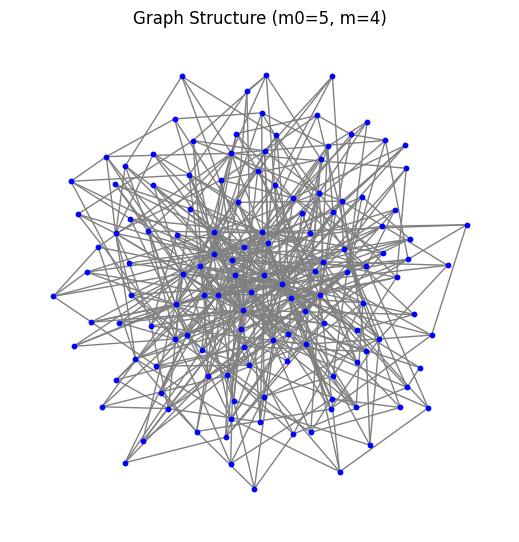

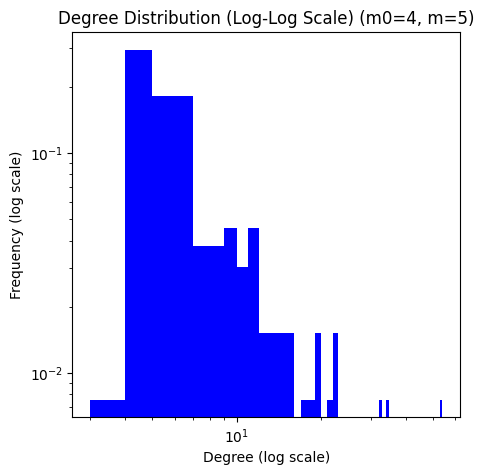

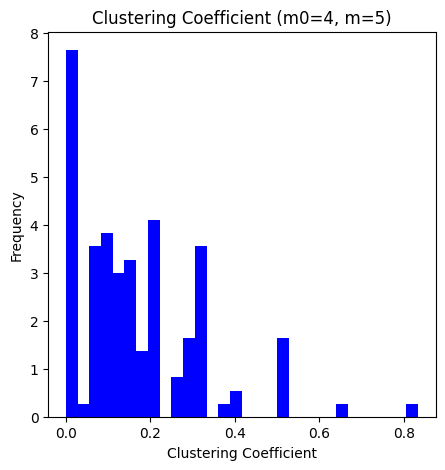

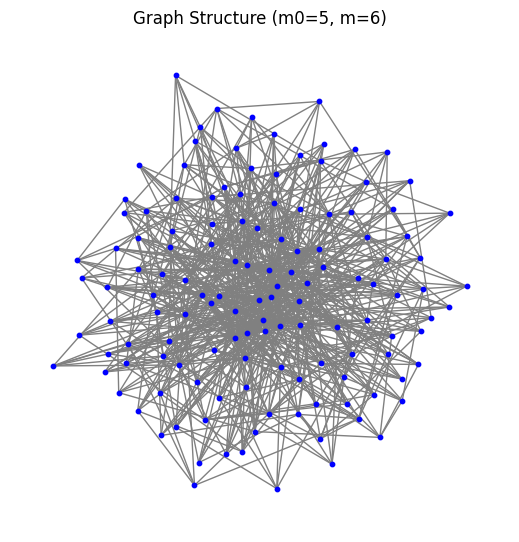

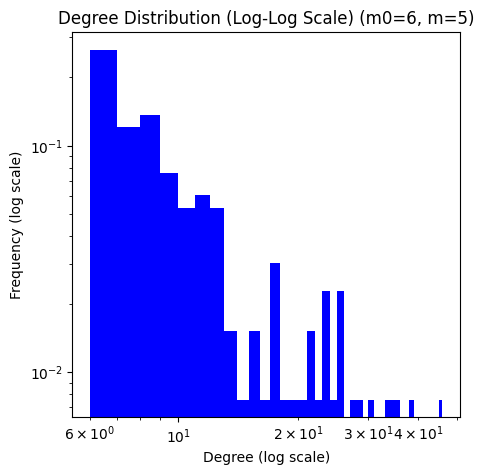

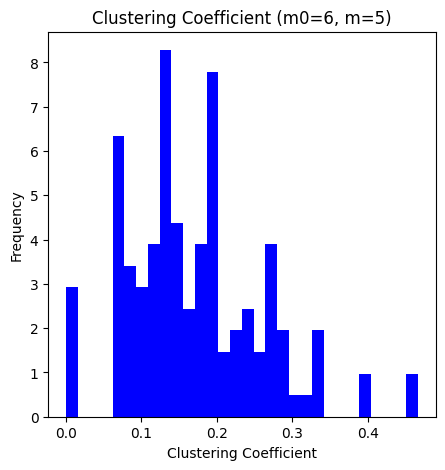

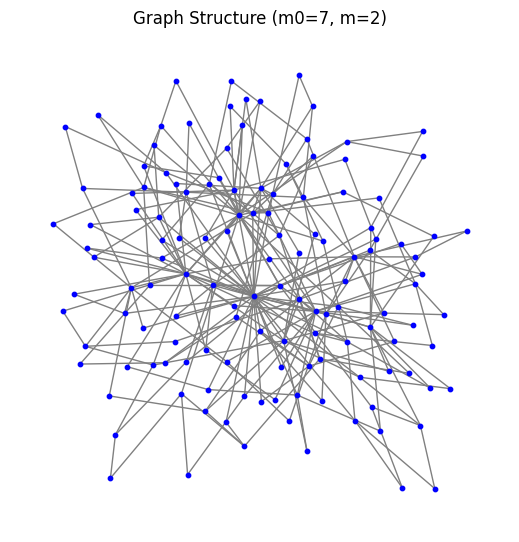

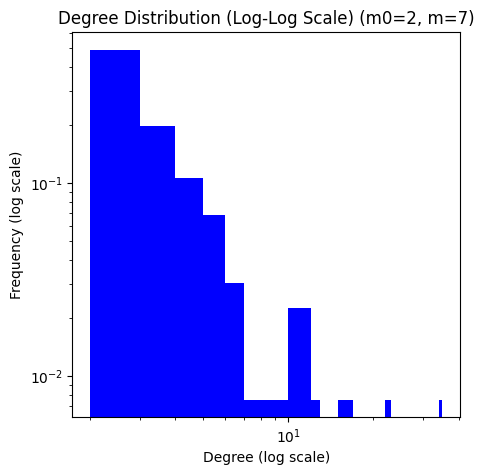

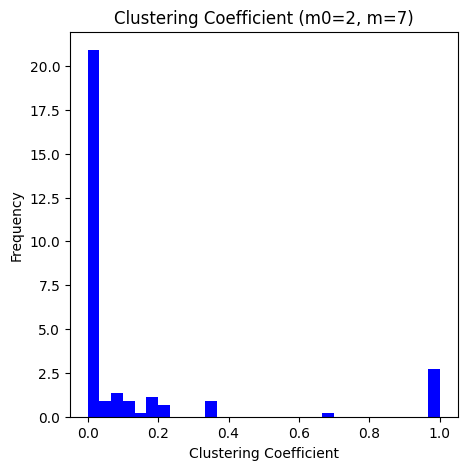

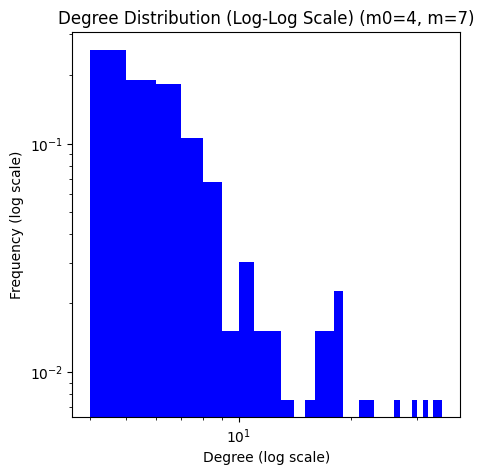

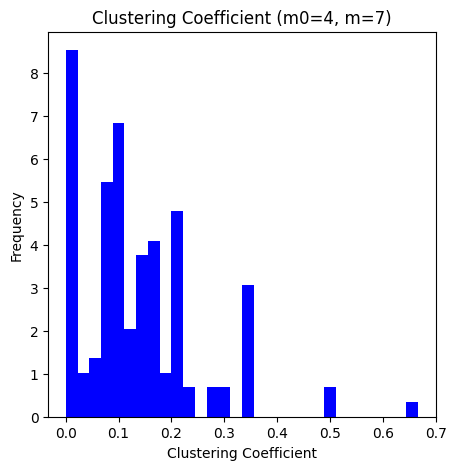

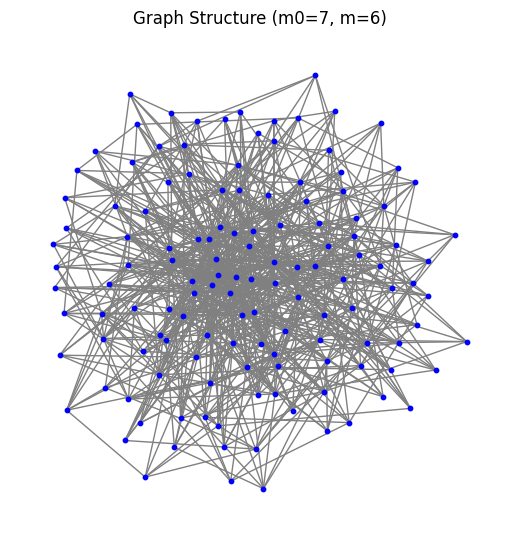

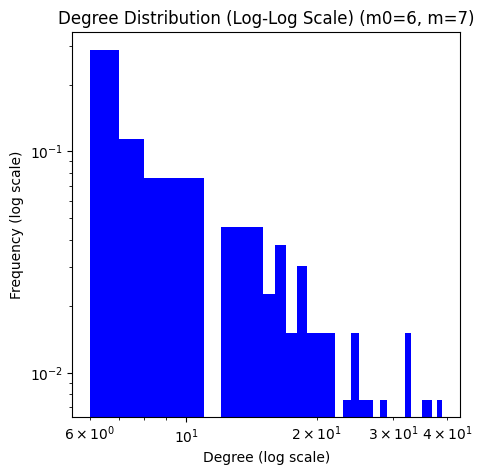

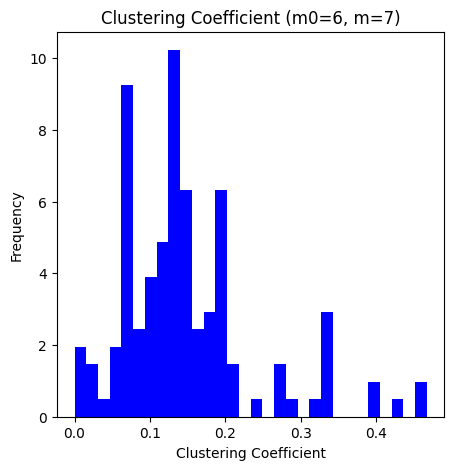

In [61]:
for m0 in m0_values:
    for m in m_values:
        G = nx.barabasi_albert_graph(n, m)
        plot_ba_graph(G, m0, m)

#### (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?

To compare let us follow the same steps for the facebook and twitter network and plot their graph, degree distribution and clustering coefficient

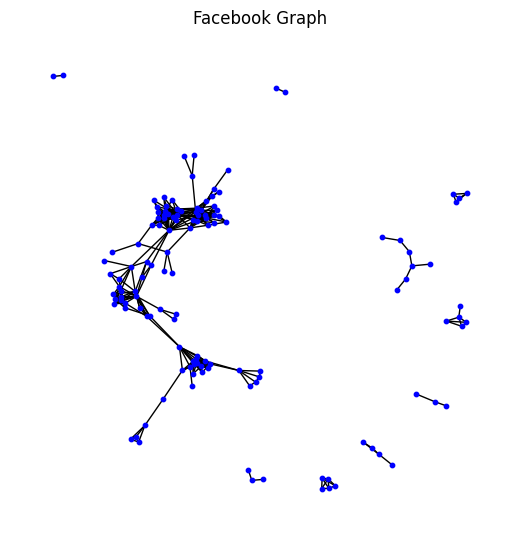

In [62]:
# plot facebook graph

plt.figure(figsize=(5, 5))
nx.draw(facebook, node_size=10, node_color='blue')
plt.title(f'Facebook Graph')
plt.show()

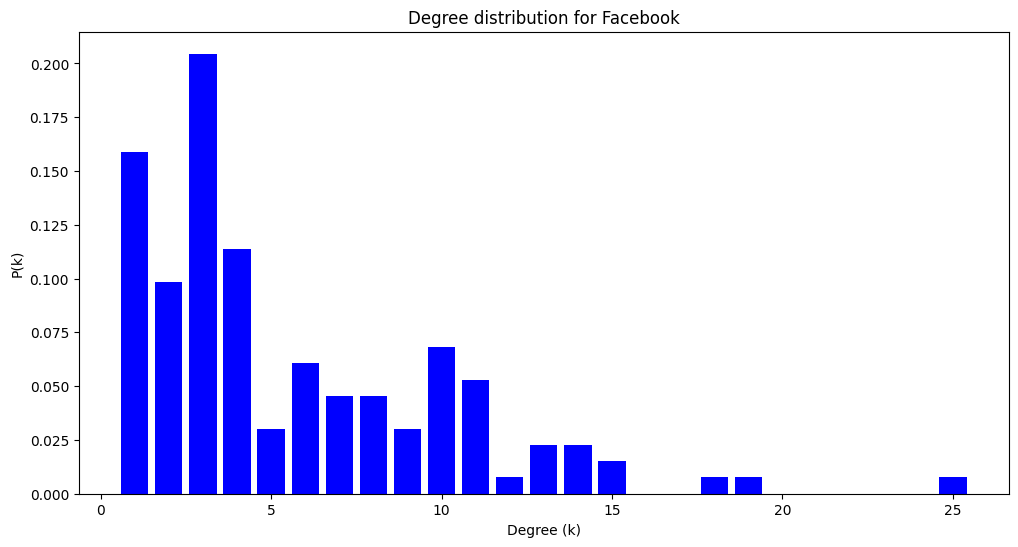

In [63]:
# facebook degree distribution

import collections
degrees = [d for _, d in facebook.degree()]

degree_count = collections.Counter(degrees)
deg, cnt = zip(*degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="blue", width=0.80)
plt.title("Degree distribution for Facebook")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

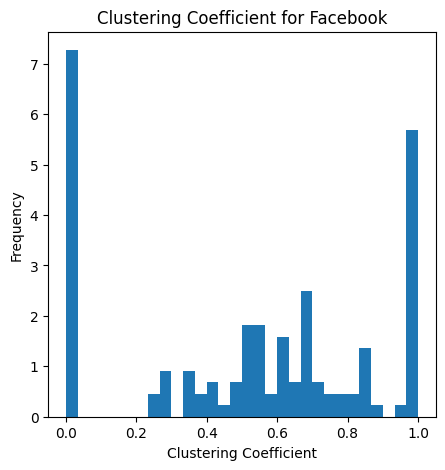

In [64]:
# plot clustering coeffs
clustering_coeffs = list(nx.clustering(facebook).values())
plt.figure(figsize=(5, 5))
plt.hist(clustering_coeffs, bins=30, density=True)
plt.title(f'Clustering Coefficient for Facebook')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

#### **Conclusion**

Based on the previously generated graphs and plots, and looking at the similar metrics/plots for facebook, we notice that while Watts-Strogatz model does a great job at approximating the clustering coeffcients, the graphs based on the **Barabási-Albert Model** approximate our facebook network the most in terms of degree distribution and relatively clustering coefficients. The reason behond this is that the **Barabási-Albert Model** generates a scale free network that has a **Power-Law degree distribution** that captures the behavior of social networks (a small number of users have a very high number of connections while most users have very few connections) through **preferential attachement** (new nodes have a higher probability of connecting with well-connected nodes)